In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler

from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('balanced_dataset.csv')

In [3]:
print(data.head())

   Unnamed: 0  Unnamed: 0.1  SRC_ADD  DES_ADD  PKT_ID  FROM_NODE  TO_NODE  \
0           0             0      3.0    24.30  389693         21       23   
1           1             1     15.0    24.15  201196         23       24   
2           2             3     24.9     9.00  443135         23       21   
3           3             4     24.8     8.00  157335         23       21   
4           4             5     24.1     1.00  219350         21        1   

  PKT_TYPE  PKT_SIZE    FLAGS    ...        PKT_RATE  BYTE_RATE  PKT_AVG_SIZE  \
0      tcp      1540  -------    ...      328.240918   505490.0        1540.0   
1      tcp      1540  -------    ...      328.205808   505437.0        1540.0   
2      ack        55  -------    ...      328.064183    18043.5          55.0   
3      ack        55  -------    ...      328.113525    18046.2          55.0   
4      ack        55  -------    ...      328.297902    18056.4          55.0   

   UTILIZATION PKT_DELAY PKT_SEND_TIME  PKT_RESEVE

In [4]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SRC_ADD', 'DES_ADD', 'PKT_ID',
       'FROM_NODE', 'TO_NODE', 'PKT_TYPE', 'PKT_SIZE', 'FLAGS', 'FID',
       'SEQ_NUMBER', 'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'NODE_NAME_FROM',
       'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE',
       'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY',
       'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 'FIRST_PKT_SENT',
       'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')


In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("Unnamed: 0.1", axis=1, inplace=True)

In [6]:
data.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10850a6a0>,
      dtype=object)

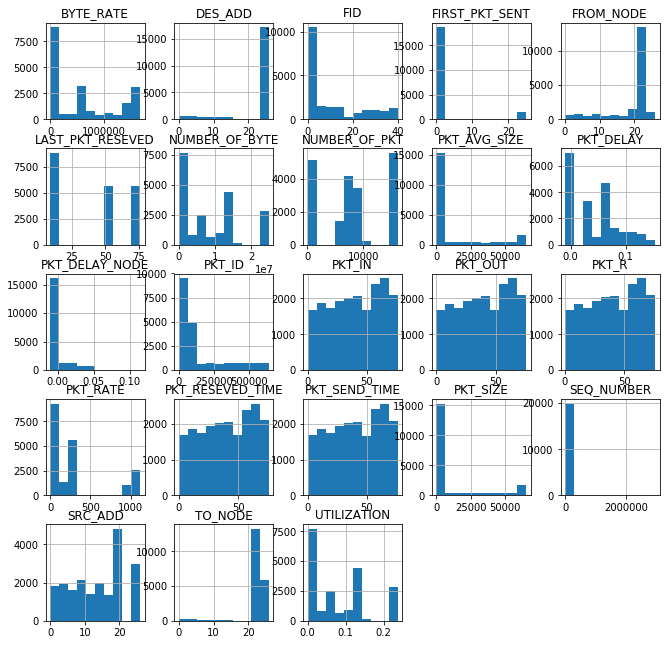

In [7]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [8]:
dummy_pkt_type = pd.get_dummies(data['PKT_TYPE'])
data = pd.concat([data, dummy_pkt_type], axis = 1)

dummy_flags = pd.get_dummies(data['FLAGS'])
data = pd.concat([data, dummy_flags], axis = 1)

data.drop("NODE_NAME_FROM",axis=1,inplace=True)
data.drop("NODE_NAME_TO",axis=1,inplace=True)

In [9]:
data.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE',
       'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY',
       'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 'FIRST_PKT_SENT',
       'LAST_PKT_RESEVED', 'PKT_CLASS', 'ack', 'cbr', 'ping', 'tcp', '-------',
       '---A---'],
      dtype='object')

In [10]:
features = ['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_SIZE',
       'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN',
       'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE',
       'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME',
       'PKT_RESEVED_TIME', 'FIRST_PKT_SENT', 'LAST_PKT_RESEVED',
       'ack', 'cbr', 'ping', 'tcp', '-------', '---A---']
X = data[features].values
Y = data['PKT_CLASS']

print(X.shape)
print(Y.shape)

(20000, 29)
(20000,)


In [11]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [12]:
dummy_Y = np_utils.to_categorical(encoded_Y)

In [13]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, encoded_Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(20000, 19)

In [14]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X_new)
standardised_X = scalar.transform(X_new)

# variables available for export

*All values are numpy arrays*

- <strong>X</strong> : Initial X values
- <strong>X_new</strong> : X after feature selection 
- <strong>standardised_X</strong> : X_new after standardisation
- <strong>Y</strong> : Intial Y with string values
- <strong>encoded_Y</strong> : Y after integer encoding
- <strong>dummy_Y</strong> : encoded_Y after OneHotEncoding